## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [3]:
import pandas as pd
import numpy as np

def read_N(N: int):
    data = pd.read_csv("~/data/data_000637.txt")
    if( N > len(data.index) or N < 10000):
        print("Choose a valid N. Setting N max")
        N = len(data.index)
    data = data[data.index < N]
    return data
data = read_N(20000)

print(data)


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
19995     1     0           27  3869200366        2513        29
19996     1     0           63  3869200366        2517         6
19997     1     0           32  3869200366        2519         5
19998     1     0           17  3869200366        2522        21
19999     1     0           64  3869200366        2522         0

[20000 rows x 6 columns]


In [4]:
#Counting how many BX_COUNTER are needed for ORBIT_CNT to be incremented by one
max_bx = np.max(data["BX_COUNTER"])
print("There are ", max_bx , " in 1 ORBIT_CNT")


There are  3563  in 1 ORBIT_CNT


In [5]:
%timeit read_N(30000)

256 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
max_tdc_meas = np.max(data["TDC_MEAS"])
print("So 1 unit of TDC is essentialy" , 1/max_tdc_meas ," of BX_COUNTER  (which is 25 ns)")
print("So a single unit of TDC is", 25/(max_tdc_meas+1), " ns")
print("And a single unit of ORBIT_CNT is thus", 25*(max_bx+1), "ns")
data["ABS_TIME"] = 25*(max_bx+1)*data["ORBIT_CNT"] + data["BX_COUNTER"] * 25  + data["TDC_MEAS"] * 25/(max_tdc_meas+1)
data.sort_values(by="ABS_TIME")
data.tail(1000)

So 1 unit of TDC is essentialy 0.034482758620689655  of BX_COUNTER  (which is 25 ns)
So a single unit of TDC is 0.8333333333333334  ns
And a single unit of ORBIT_CNT is thus 89100 ns


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
19000,1,0,35,3869200357,1640,17,3.447458e+14
19001,1,0,38,3869200357,1643,8,3.447458e+14
19002,1,1,48,3869200357,1640,1,3.447458e+14
19003,1,0,60,3869200357,1647,26,3.447458e+14
19004,1,0,139,3869200357,1649,0,3.447458e+14
...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,3.447458e+14
19996,1,0,63,3869200366,2517,6,3.447458e+14
19997,1,0,32,3869200366,2519,5,3.447458e+14
19998,1,0,17,3869200366,2522,21,3.447458e+14


In [7]:
#data["HEAD"] = pd.Series(np.random.randint(0,2,(len(data["HEAD"]))),data.index)
data["HEAD"] = np.random.randint(0,2, len(data["HEAD"]))
data = data[data["HEAD"] == 1]
data.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
1,1,0,124,3869200167,2374,27,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14
10,1,1,7,3869200167,2785,4,3.447457e+14
11,1,0,64,3869200167,2786,19,3.447457e+14
13,1,0,36,3869200167,2791,23,3.447457e+14
21,1,0,57,3869200167,2789,10,3.447457e+14
22,1,0,61,3869200167,2790,23,3.447457e+14
24,1,0,58,3869200167,2795,19,3.447457e+14


In [8]:
data["HEAD"] = np.random.randint(0,2,len(data)) 
data = data[data["HEAD"]==1]
data.head(100)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
1,1,0,124,3869200167,2374,27,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
10,1,1,7,3869200167,2785,4,3.447457e+14
11,1,0,64,3869200167,2786,19,3.447457e+14
21,1,0,57,3869200167,2789,10,3.447457e+14
...,...,...,...,...,...,...,...
393,1,1,4,3869200171,2344,19,3.447457e+14
394,1,1,3,3869200171,2348,16,3.447457e+14
402,1,0,56,3869200171,2431,5,3.447457e+14
405,1,0,49,3869200171,2458,13,3.447457e+14


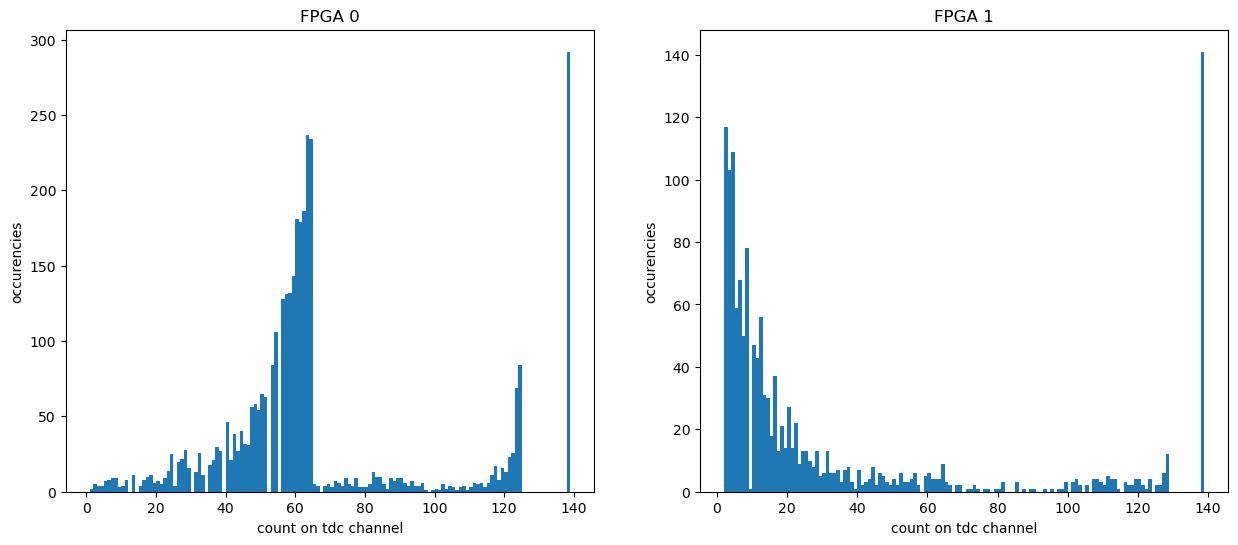

In [9]:
import matplotlib.pyplot as plt

data_FPGA0 = data[data["FPGA"]==0]
data_FPGA1 = data[data["FPGA"]==1]
fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols =2, figsize=(15,6))
ax1.hist(data_FPGA0["TDC_CHANNEL"], bins=np.arange(np.min(data_FPGA0["TDC_CHANNEL"]), np.max(data_FPGA0["TDC_CHANNEL"])+1), label='Count on TDC channel')
ax1.set_title("FPGA 0")
ax1.set_xlabel('count on tdc channel')
ax1.set_ylabel('occurencies')
ax2.hist(data_FPGA1["TDC_CHANNEL"], bins=np.arange(np.min(data_FPGA1["TDC_CHANNEL"]), np.max(data_FPGA1["TDC_CHANNEL"]))+1)
ax2.set_title("FPGA 1")
ax2.set_xlabel('count on tdc channel')
ax2.set_ylabel('occurencies')

plt.show()


In [10]:
#using groupby
#HEAD is always 1, so grouping by TDC-channel and summing up, the occurrencies are on the HEAD columns
occurrencies0 = pd.Series(data_FPGA0.groupby("TDC_CHANNEL").sum()["HEAD"])
occurrencies1 = pd.Series(data_FPGA1.groupby("TDC_CHANNEL").sum()["HEAD"])
# so now,
print("Regarding FPGA 0, the noisiest channels are", occurrencies0.sort_values().index[-1], occurrencies0.sort_values().index[-2], occurrencies0.sort_values().index[-3])
print()
print("Regarding FPGA 1, the noisiest channels are", occurrencies1.sort_values().index[-1], occurrencies1.sort_values().index[-2], occurrencies1.sort_values().index[-3])


Regarding FPGA 0, the noisiest channels are 139 63 64

Regarding FPGA 1, the noisiest channels are 139 2 4


In [21]:
#Now we'll count the number of unique orbits using groupby

occurrencies_orb = data.groupby("ORBIT_CNT").sum()["HEAD"]
print(occurrencies_orb)
print("So there are", len(occurrencies_orb), "different unique values for ORBIT_CNT")

#now we need to count the unique orbit with at least one measurement from channel 139
grouped = (data.groupby(["ORBIT_CNT", "TDC_CHANNEL"]).sum())
#filtering: this only affects the dataset and remove all the ORBIT_CNT that do not have any TDC_CHANNEL set to 139
occ139 = data.groupby("ORBIT_CNT").filter(lambda x: 139 in x["TDC_CHANNEL"].values)
#now group again with this modified dataset with the correctly filtered ORBIT_CNT
occurrencies_orb = occ139.groupby("ORBIT_CNT").sum()["HEAD"]
print()
print(occurrencies_orb)

ORBIT_CNT
3869200167    11
3869200168    22
3869200169    30
3869200170    22
3869200171    24
              ..
3869200362    17
3869200363    26
3869200364    26
3869200365    33
3869200366     9
Name: HEAD, Length: 200, dtype: int64
So there are 200 different unique values for ORBIT_CNT

ORBIT_CNT
3869200168    22
3869200169    30
3869200170    22
3869200171    24
3869200172    20
              ..
3869200361    34
3869200362    17
3869200363    26
3869200364    26
3869200365    33
Name: HEAD, Length: 178, dtype: int64
